In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
%pylab inline
import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


In [2]:
hw_abt_2_bybucket=pd.read_csv('D:/Techno/task7/hw_abt_2_bybucket.csv', header=0, delimiter='\t')

In [3]:
hw_abt_2_byuser=pd.read_csv('D:/Techno/task7/hw_abt_2_byuser.csv', header=0, delimiter='\t')

In [4]:
hw_abt_2_byuser

,Unnamed: 0,group_id,metric_value,users,visits,churn_users,churn_visits,group
0,0,8,6630.000,0,0,0,8,A
1,1,13,6933.976,0,0,1,6,B
2,2,10,8261.976,1,10,1,8,B
3,3,4,5522.000,1,9,1,7,A
4,4,16,5075.976,1,6,0,8,B
...,...,...,...,...,...,...,...,...
4995,4995,6,3666.000,1,4,1,5,A
4996,4996,12,6464.976,0,0,1,8,B
4997,4997,1,4335.000,0,0,0,8,A
4998,4998,13,6307.976,0,0,1,8,B


In [5]:
test=(hw_abt_2_byuser['visits'] == 0) & (hw_abt_2_byuser['users'] != 0)

In [6]:
test.describe()

count      5000
unique        2
top       False
freq       4783
dtype: object

Проведя проверку данных мы видим, что в результате ошибки логирования часть данных имеют неоднозначность: количество пользователей ненулевое, при нулевом числе посещений. Значению числа посещений в данном случае верить нельзя. Заменим их на средние.

In [7]:
hw_abt_2_byuser.loc[(hw_abt_2_byuser['visits'] == 0) & (hw_abt_2_byuser['users'] != 0), 'visits'] = hw_abt_2_byuser['visits'].mean()

Отсортируем значения по группам для разделения на контрольную и экспериментальную.

In [8]:
hw_abt_2_byuser=hw_abt_2_byuser.sort_values(by='group')
hw_abt_2_byuser=hw_abt_2_byuser.reset_index(drop=True)
hw_abt_2_byuser['group'].describe()

count     5000
unique       2
top          B
freq      2549
Name: group, dtype: object

In [9]:
hw_abt_2_byuser_A=hw_abt_2_byuser[0:2451]

In [10]:
hw_abt_2_byuser_B=hw_abt_2_byuser[2451:]

In [11]:
hw_abt_2_byuser_A

,Unnamed: 0,group_id,metric_value,users,visits,churn_users,churn_visits,group
0,0,8,6630.0,0,0.0,0,8,A
1,2760,8,7490.0,0,0.0,0,8,A
2,2765,4,4838.0,1,28.0,1,7,A
3,2766,5,5936.0,0,0.0,1,6,A
4,2768,8,3158.0,1,5.0,0,8,A
...,...,...,...,...,...,...,...,...
2446,1389,3,8008.0,1,3.0,1,3,A
2447,1635,5,4063.0,1,9.0,1,7,A
2448,196,8,7552.0,0,0.0,0,7,A
2449,1550,1,7239.0,1,11.0,0,8,A


# Оценка равенства дисперсий исследуемых метрик в группах и проверка нормальности распределений

Проведем проверку метрики metric_value на нормальность двумя способами: тест Колмогорова-Смирнова и тест Шапиро-Уилка для двух групп.

Группа А:

In [12]:
from scipy.stats import kstest
alpha = 0.05
st = kstest(hw_abt_2_byuser_A['metric_value'], 'norm')
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distributions is not normal



In [13]:
from scipy.stats import shapiro
alpha = 0.05
st = shapiro(hw_abt_2_byuser_A['metric_value'])
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distributions is not normal



Оба теста говорят, что распределение не является нормальным на уровне значимости 5%. Построим Q-Q plot

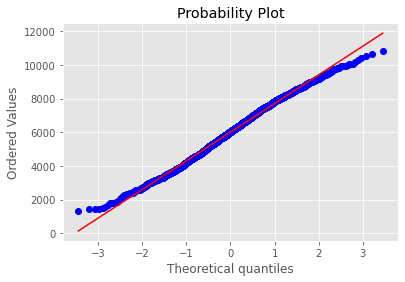

In [14]:
import numpy as np 
import pylab 
import scipy.stats as stats

   
stats.probplot(hw_abt_2_byuser_A['metric_value'], dist="norm", plot=pylab)
pylab.show()

По  Q-Q plot складывается ощущение, что распределения очень близки к нормальному. Однако, мы не будем рисковать и в дальнейшем для проверки равенства дисперсий будем использовать тест Левена, который менее чувствителен к отклонению распределения от нормального.

Группа В:

In [15]:
from scipy.stats import kstest
alpha = 0.05
st = kstest(hw_abt_2_byuser_B['metric_value'], 'norm')
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distributions is not normal



In [16]:
from scipy.stats import shapiro
alpha = 0.05
st = shapiro(hw_abt_2_byuser_B['metric_value'])
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distributions is not normal



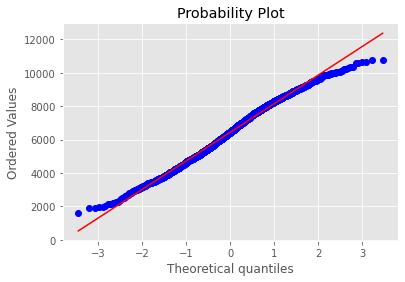

In [17]:
import numpy as np 
import pylab 
import scipy.stats as stats

   
stats.probplot(hw_abt_2_byuser_B['metric_value'], dist="norm", plot=pylab)
pylab.show()

Для группы B результат аналогичный, причем отклонения от нормального даже выше.

In [18]:
import numpy as np
from scipy.stats import levene
alpha = 0.05

def levene_test(df1, df2, p_value = alpha):
    st = levene(df1, df2)
    print('Variances of distributions is {}equal\n'.format( {True:'not ',False:''}[st[1] < p_value]))
    
levene_test(hw_abt_2_byuser_A['metric_value'], hw_abt_2_byuser_B['metric_value'])

Variances of distributions is equal



По критерию Левена на 5% уровне значимости дисперсии двух выборок можно признать равными

Создадим собственные метрики. Например, будем считать долю успешных посещений сайта. Под успешными, будем понимать посещения, которые привели к целевому действию. Уберем все записи, где не было ниодного визита.

In [19]:
share_visits_A=hw_abt_2_byuser_A['visits']/(hw_abt_2_byuser_A['churn_visits']+hw_abt_2_byuser_A['visits'])

In [20]:
share_visits_A=share_visits_A.dropna()

In [21]:
share_visits_B=hw_abt_2_byuser_B['visits']/(hw_abt_2_byuser_B['churn_visits']+hw_abt_2_byuser_B['visits'])

In [22]:
share_visits_B=share_visits_B.dropna()

Группа А:

In [23]:
from scipy.stats import kstest
alpha = 0.05
st = kstest(share_visits_A, 'norm')
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distributions is not normal



In [24]:
from scipy.stats import shapiro
alpha = 0.05
st = shapiro(share_visits_A)
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distributions is not normal



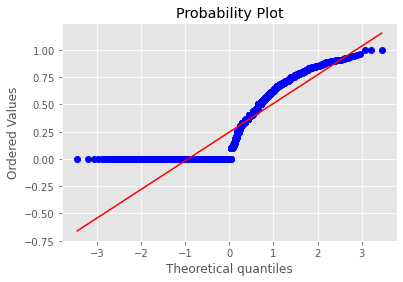

In [25]:
import numpy as np 
import pylab 
import scipy.stats as stats

   
stats.probplot(share_visits_A, dist="norm", plot=pylab)
pylab.show()

Распределение данной метрики не является нормальным, что видно и на тестах и на QQ- plot.

Группа B:

In [26]:
from scipy.stats import kstest
alpha = 0.05
st = kstest(share_visits_B, 'norm')
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distributions is not normal



In [27]:
from scipy.stats import shapiro
alpha = 0.05
st = shapiro(share_visits_B)
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distributions is not normal



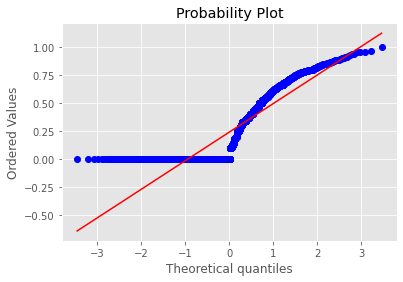

In [28]:
import numpy as np 
import pylab 
import scipy.stats as stats

   
stats.probplot(share_visits_B, dist="norm", plot=pylab)
pylab.show()

Для данной метрики распределение тоже не является нормальным. Просто для интереса попробуем сравнить, что дадут все виды тестов на равенство дисперсий. Доверять будем только тесту Левена.

In [29]:
levene_test(share_visits_A, share_visits_B)

Variances of distributions is equal



In [30]:

from scipy.stats import f_oneway
alpha = 0.05
st = f_oneway(share_visits_A, share_visits_B)
print('{} the H0: Var(X1) == Var(X2)\n'.format(
{True:'Reject', False:'Confirm'}[st[1] > alpha]))

Reject the H0: Var(X1) == Var(X2)



In [31]:
from scipy.stats import bartlett
alpha = 0.05
def bartlett_test(df1, df2, p_value = alpha):
    st = bartlett(df1, df2)
    print('Variances of distributions is {}equal\n'.format( {True:'not ', False:''}[st[1] < p_value]))

bartlett_test(share_visits_A, share_visits_B)

Variances of distributions is equal



Тест Фишера дает результат отличный, от двух других тестов. Можно с натяжкой сказать, что он более чувствителен к нормальности распределения, чем тест Бартлетта.

В качестве метрики также рассмотрим долю ушедших от нас пользователей. Откуда также уберет случаи, когда пользователей не было вообще.

In [32]:
share_churn_users_A=hw_abt_2_byuser_A['users']/(hw_abt_2_byuser_A['churn_users']+hw_abt_2_byuser_A['users'])

In [33]:
share_churn_users_A=share_churn_users_A.dropna()

In [34]:
share_churn_users_B=hw_abt_2_byuser_B['users']/(hw_abt_2_byuser_B['churn_users']+hw_abt_2_byuser_B['users'])

In [35]:
share_churn_users_B=share_churn_users_B.dropna()

Группа А:

In [36]:
from scipy.stats import kstest
alpha = 0.05
st = kstest(share_churn_users_A, 'norm')
print('Distributions is {}normal\n'.format( {True:'not ',False:''}[st[1] < alpha]))

Distributions is not normal



In [37]:
from scipy.stats import shapiro
alpha = 0.05
st = shapiro(share_churn_users_A)
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distributions is not normal



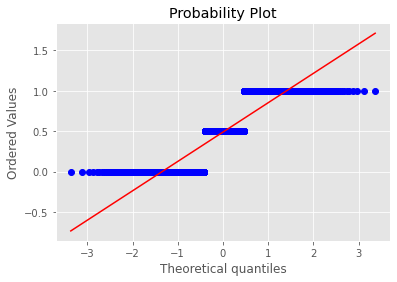

In [38]:
import numpy as np 
import pylab 
import scipy.stats as stats

   
stats.probplot(share_churn_users_A, dist="norm", plot=pylab)
pylab.show()

Распределение не является нормальным по всем показателям для группы А

In [39]:
from scipy.stats import kstest
alpha = 0.05
st = kstest(share_churn_users_B, 'norm')
print('Distributions is {}normal\n'.format( {True:'not ',False:''}[st[1] < alpha]))

Distributions is not normal



In [40]:
from scipy.stats import shapiro
alpha = 0.05
st = shapiro(share_churn_users_B)
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distributions is not normal



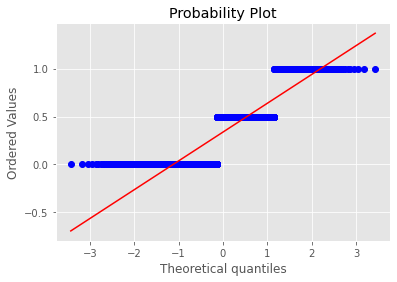

In [41]:
import numpy as np 
import pylab 
import scipy.stats as stats

   
stats.probplot(share_churn_users_B, dist="norm", plot=pylab)
pylab.show()

Распределение не является нормальным по всем показателям для группы В

In [42]:
levene_test(share_churn_users_A, share_churn_users_B)

Variances of distributions is not equal



Тест Левена на 5% уровне значимости дает, что дисперсии двух распределений не равны.

# Проверка статистической значимости различий исследуемых метрик в выборках при помощи библиотеки bootstrapped

Метрика: metric_value

In [43]:
!pip install bootstrapped

  Created wheel for bootstrapped: filename=bootstrapped-0.0.2-py2.py3-none-any.whl size=13960 sha256=34dc73578719d0c16e7e8d8fb9173a34dbb33455819e11bfc21881748570bf3f
  Stored in directory: c:\users\egoro\appdata\local\pip\cache\wheels\15\55\6a\9a722f067ac4c3dfab359ed2ec7906b9cc6649156d9886bd59
Successfully built bootstrapped


In [45]:
import matplotlib.pyplot as plt
from bootstrapped import bootstrap as bs
from bootstrapped import compare_functions as bs_compare
from bootstrapped import stats_functions as bs_stats

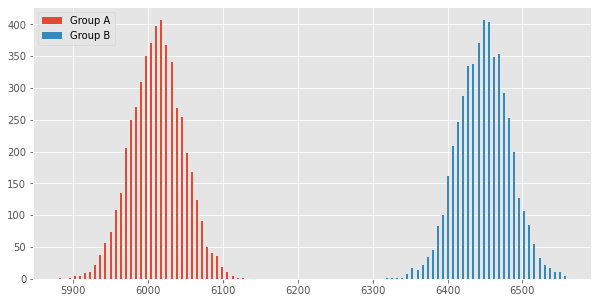

In [47]:
bs_a = bs.bootstrap(hw_abt_2_byuser_A['metric_value'].values, stat_func=bs_stats.mean, 
             num_iterations=5000, iteration_batch_size=50, 
             return_distribution=True)

bs_b = bs.bootstrap(hw_abt_2_byuser_B['metric_value'].values, stat_func=bs_stats.mean, 
             num_iterations=5000, iteration_batch_size=200, 
             return_distribution=True)

plt.figure(figsize=(10,5))
plt.hist([bs_a, bs_b], bins = 100, label=['Group A', 'Group B'])
plt.legend(loc='upper left')
plt.show()

In [49]:
from scipy.stats import kstest
alpha = 0.05
st = kstest(bs_a, 'norm')
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distributions is not normal



In [50]:
from scipy.stats import shapiro
alpha = 0.05
st = shapiro(bs_a)
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distributions is normal



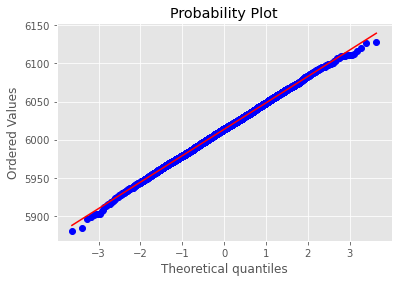

In [51]:
import numpy as np 
import pylab 
import scipy.stats as stats

   
stats.probplot(bs_a, dist="norm", plot=pylab)
pylab.show()

Тест Колмогорова-Смирнова показывает, что распределение не является нормальным. Тест Шапиро-Уилка, что является. По  Q-Q plot видно, что скорее всего оно действительно нормальное. Доверимся этому результату, это же и должно быть по теории(центральная предельная теорема). Повторим процесс для B.

In [52]:
from scipy.stats import kstest
alpha = 0.05
st = kstest(bs_b, 'norm')
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distributions is not normal



In [53]:
from scipy.stats import shapiro
alpha = 0.05
st = shapiro(bs_b)
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distributions is normal



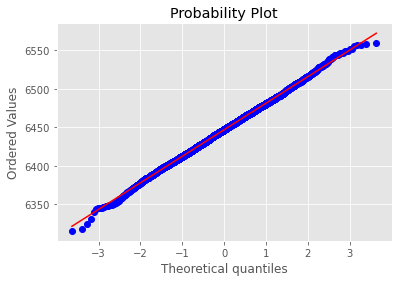

In [54]:
import numpy as np 
import pylab 
import scipy.stats as stats

   
stats.probplot(bs_b, dist="norm", plot=pylab)
pylab.show()

Для группы B ситуация аналогичная. Так как мы больше доверяем тому, что это распределение нормальная будем использовать параметрические методы, так как их мощность выше.

In [55]:
from scipy.stats import ttest_ind
st = ttest_ind(bs_a, bs_b)
st

Ttest_indResult(statistic=-626.708487147598, pvalue=0.0)

На основании результатов t теста делаем вывод, что выборки статистически значимо различаются на всех уровнях значимости. Это означает, что произошли некоторые изменения(какие, мы не можем сказать до визуализации).

Для остальных метрик нельзя применять бутстрап до линеаризации, так как они являются отношениями(проходили на лекции). Мне не удалось самому разобраться с линеаризацией из-за нехватки времени и, возможно, понимания. Был бы благодарен за любую полезную информацию по реализации этого процесса в python.

# Гистограммы и диаграммы размаха

# До бутстрапирования:

<AxesSubplot:ylabel='Frequency'>

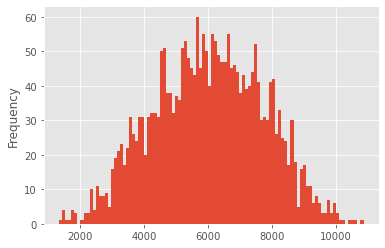

In [106]:
hw_abt_2_byuser_A['metric_value'].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

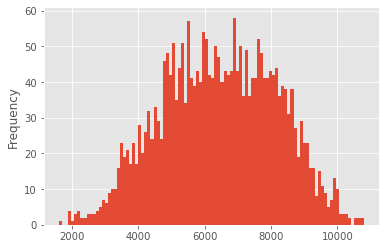

In [107]:
hw_abt_2_byuser_B['metric_value'].plot.hist(bins=100)

<AxesSubplot:>

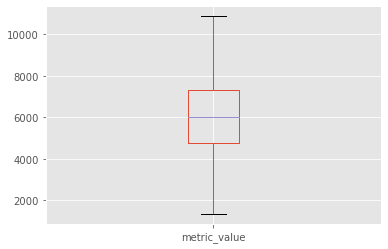

In [108]:
import matplotlib.pyplot as plt
hw_abt_2_byuser_A['metric_value'].plot.box()


<AxesSubplot:>

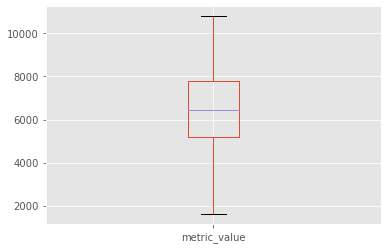

In [109]:
import matplotlib.pyplot as plt
hw_abt_2_byuser_B['metric_value'].plot.box()

Гистограмма метрики metric_value похожа на гистограмму нормально распределенной величины, но она более заострена к верху. Для экспериментальной группы значения в среднем выше, чем для контрольной.

<AxesSubplot:ylabel='Frequency'>

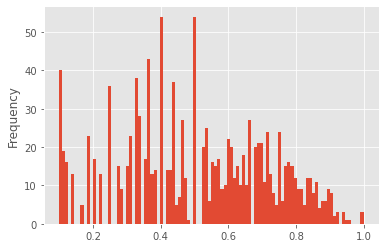

In [111]:
share_visits_A.plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

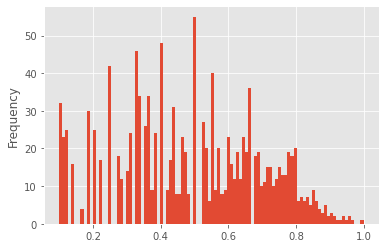

In [112]:
share_visits_B.plot.hist(bins=100)

<AxesSubplot:>

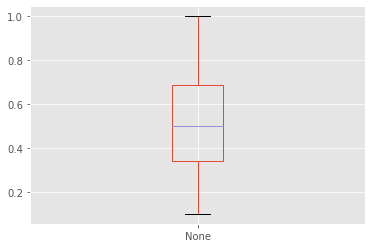

In [113]:
share_visits_A.plot.box()

<AxesSubplot:>

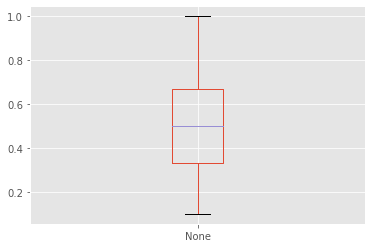

In [114]:
share_visits_B.plot.box()

Гистограмма метрики share_visits совсем непохожа на гистограмму нормально распределенной величины и имеет явную дискретность. По боксплоту трудно сказать о каком-либо отличии данной метрики для двух выборок.

<AxesSubplot:ylabel='Frequency'>

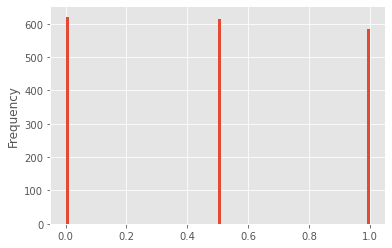

In [116]:
share_churn_users_A.plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

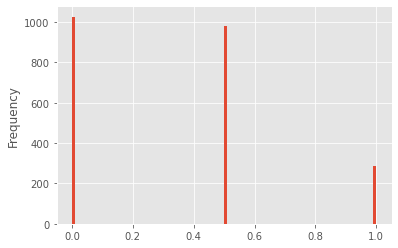

In [117]:
share_churn_users_B.plot.hist(bins=100)

<AxesSubplot:>

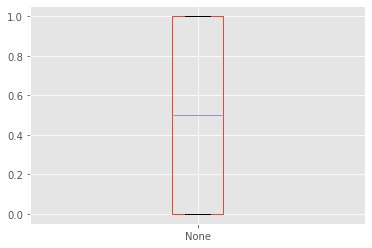

In [118]:
share_churn_users_A.plot.box()

<AxesSubplot:>

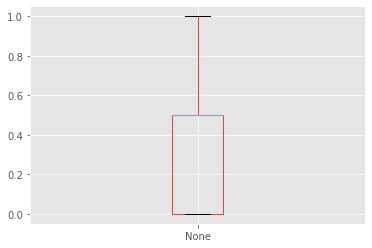

In [119]:
share_churn_users_B.plot.box()

Гистограмма метрики share_churn_users имеет 3 значения(специфика данных) и по боксплоту и по гистограммам мы видим, что для двух выборок имеются значимые отличия. Доля ушедших пользователей гораздо ниже для экспериментальной группы. По этому параметру влияние изменений положительно. Для более детального решения, этих результатов недостаточно и необходимо дальнейшее исследование.

# После бутстрапирования:

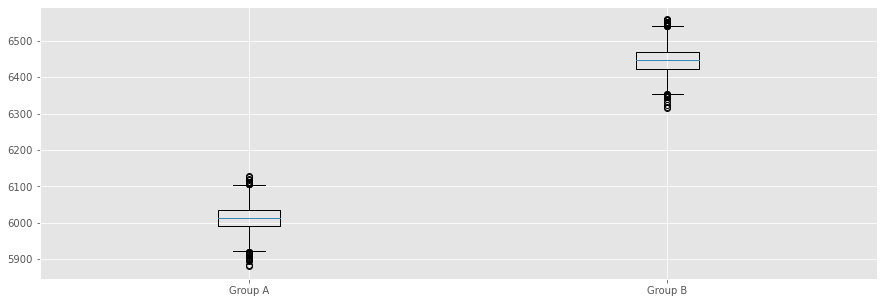

In [58]:
plt.figure(figsize=(15,5))
plt.boxplot([bs_a, bs_b])
x = np.arange(1,3)
plt.xticks(x, ('Group A', 'Group B'))
plt.show()

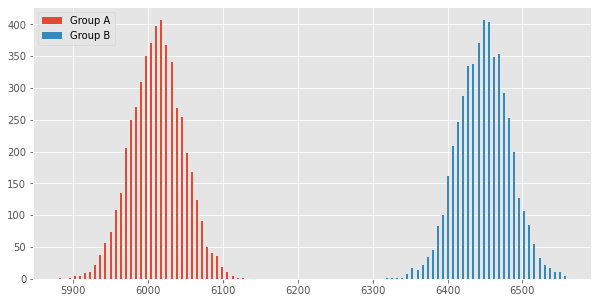

In [59]:
plt.figure(figsize=(10,5))
plt.hist([bs_a, bs_b], bins = 100, label=['Group A', 'Group B'])
plt.legend(loc='upper left')
plt.show()

Теперь мы уже можем более определенно сказать, внесение изменений имело положительный эффект. Это мы видим, по боксплоту. Значения метрики для группы B значительно выше.